# Decision Tree  Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## 1.Company Dataset

In [2]:
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [6]:
company.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [7]:
company.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

##### Label Encoding

In [8]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [9]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [10]:
type(company.ShelveLoc)

pandas.core.series.Series

In [11]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [12]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [13]:
#company['ShelveLoc']=company['ShelveLoc'].astype('int64')

In [14]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [15]:
# Normalization function 
#def norm_func(i):
 #   x = (i-i.min())/(i.max()-i.min())
  #  return (x)
    
# Normalized data frame (considering the numerical part of data)
#company_norm = norm_func(company.iloc[:,0:11])
#company_norm 

In [16]:
#company_norm.ShelveLoc.unique()

In [17]:
x=company.drop(['ShelveLoc'], axis=1)
y=company[['ShelveLoc']]
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0


In [18]:
y.tail()

,ShelveLoc
395,1
396,2
397,2
398,0
399,1


### Building Decision Tree Classifier using Entropy Criteria

In [19]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

In [20]:
type(y_test)

pandas.core.frame.DataFrame

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

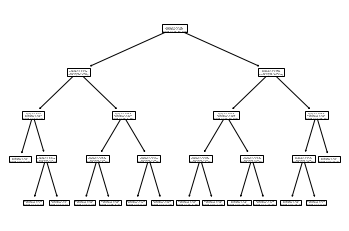

In [22]:
tree.plot_tree(model);                            #PLot the decision tree

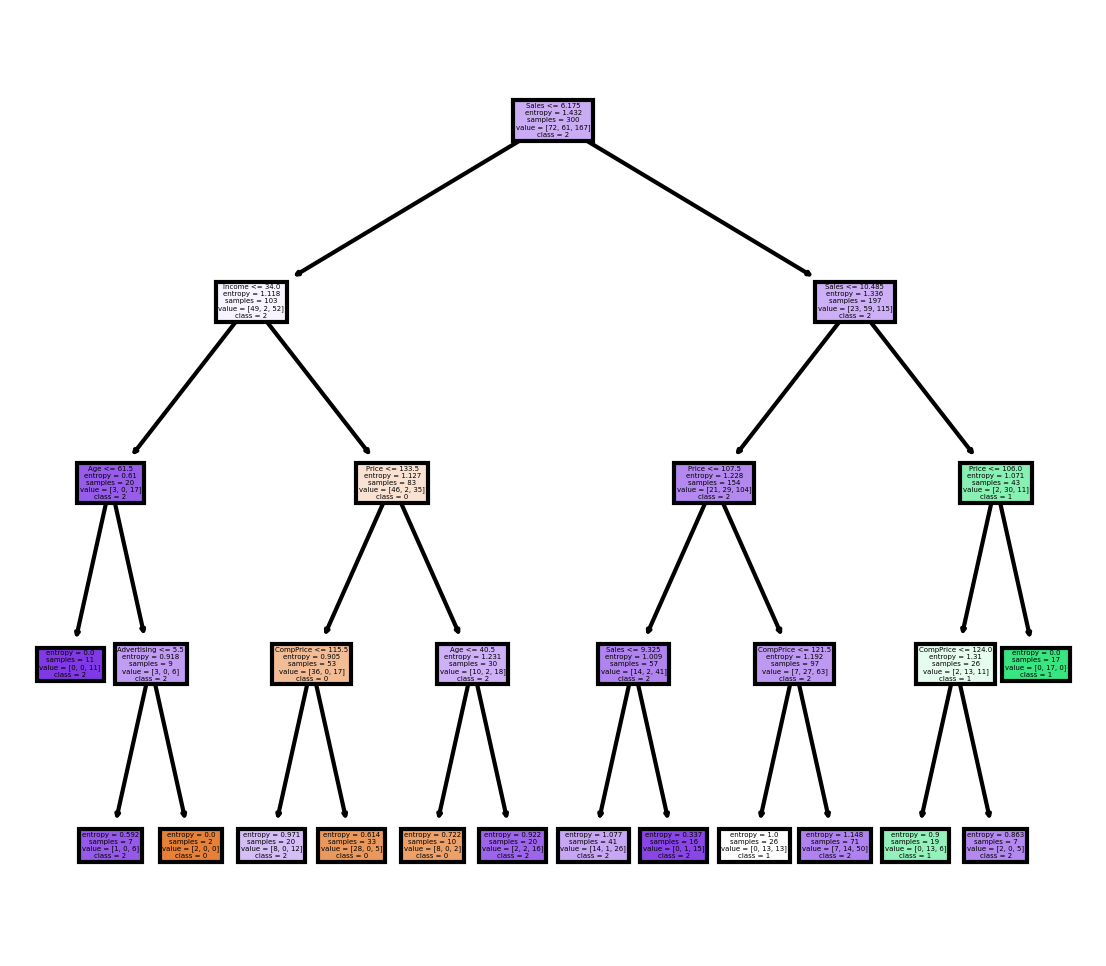

In [23]:
fn=['Sales','CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education', 'Urban', 'US']
cn=['0','1','2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4.5,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    70
1    16
0    14
dtype: int64

In [25]:
preds

array([0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2])

In [26]:
y_test          # Data Frame need to be converted to 1D array

,ShelveLoc
209,0
280,0
33,1
210,0
93,2
...,...
314,1
373,2
380,2
239,0


In [27]:
y_test = y_test.to_numpy()
y_test = np.reshape(y_test, 100)

In [28]:
y_test

array([0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0])

In [29]:
#c1=pd.DataFrame(preds,columns=['Prediction'])
#c1#.iloc[[1:,:]]
#y_test.head()

In [30]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
row_0,,,
0,7,1,16
1,0,11,13
2,7,4,41


In [31]:
np.mean(preds==y_test)        # Accuracy 

0.59

### Building Decision Tree Classifier (CART) using Gini Criteria

In [32]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.21,random_state=12)

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [34]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
#y_train

In [36]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_train)
pred

array([2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2,

#### Decision Tree Regression Example

In [37]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [38]:
array = company.values
X = array[:,0:6]
y = array[:,6]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [40]:
model0 = DecisionTreeRegressor()
model0.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
model0.score(X_test,y_test)           #Accuracy

-1.0158827122785583